####**Library and Dataset Imports**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
"""
Purpose: Loads the MNIST dataset of handwritten digits (0-9).
- train_imgs and test_imgs contain the image data.
- train_labels and test_labels contain the corresponding labels (digit classes).

"""
(train_imgs,train_labels),(test_imgs,test_labels) = tf.keras.datasets.mnist.load_data()

'60,000' images are provided for training purpose & '10,000' images are provided for testing purpose.

###**Data Preprocessing**

####**Shape and Data Exploration**

**Prints the shape of the training and testing datasets to confirm dimensions.**

MNIST dataset typically has 60,000 training and 10,000 test samples. Each image is 28x28 pixels.

In [ ]:
print(train_imgs.shape, train_labels.shape)
print(test_imgs.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
print(train_imgs[0]) #Displays the pixel intensity values of the first image in the dataset.

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

####**Single Image Visualization**

Text(0.5, 0, '5')

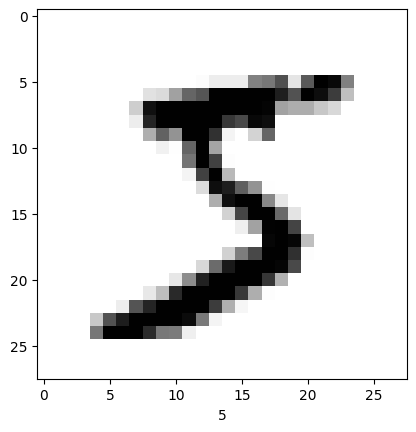

In [ ]:
# Visualizes the first image (train_imgs[0]) using Matplotlib.
plt.imshow(train_imgs[0], cmap='gray_r') # cmap='gray_r': Displays the image in grayscale.
plt.xlabel(train_labels[0]) # xlabel(train_labels[0]): Sets the label of the image as the digit it represents.

####**Grid Visualization of Images**

**Displays the first 100 images in a grid layout.**

Uses nested loops for a grid of 5 rows and 20 columns. xticks([]) and yticks([]) remove ticks to reduce visual clutter.

The figsize=(20, 7) specifies the size of the figure:
*  20: The width of the figure.
*  7: The height of the figure.

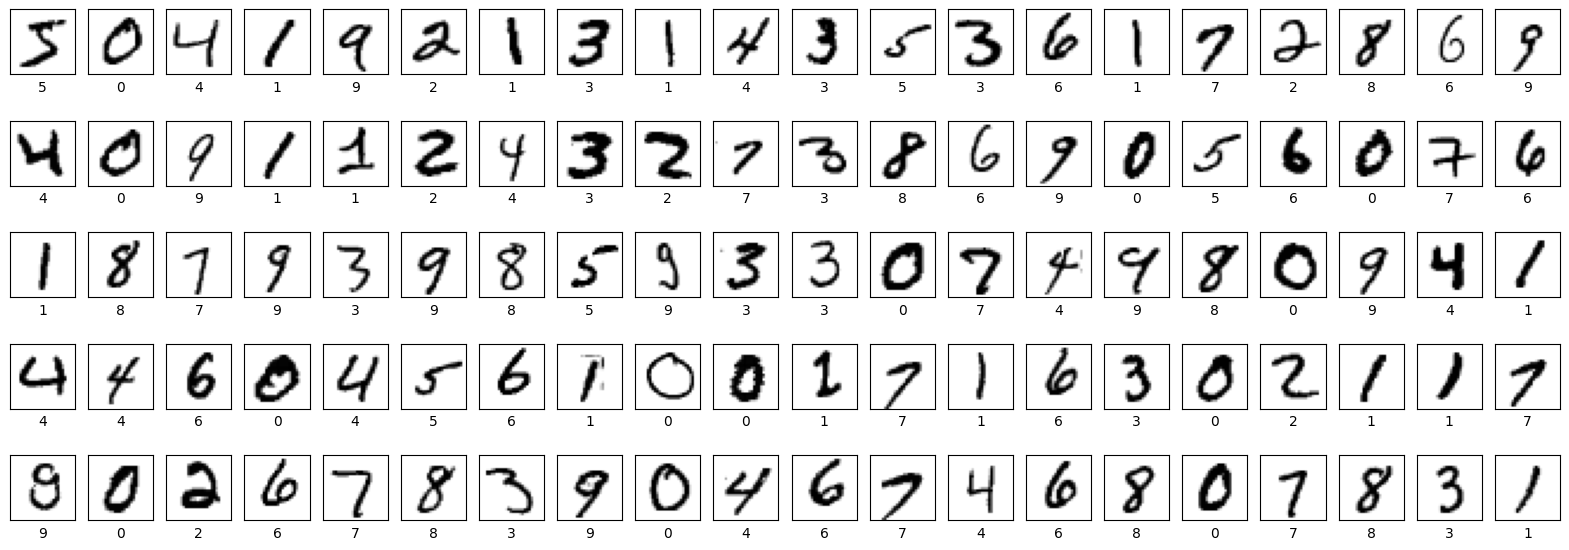

In [ ]:
i = 0
plt.figure(figsize=(20,7))
for r in range(5):
  for c in range(20):
    plt.subplot(5,20,i+1)
    plt.imshow(train_imgs[i], cmap=plt.cm.gray_r)
    plt.xlabel(train_labels[i])
    plt.xticks([])
    plt.yticks([])
    i+=1

In [ ]:
plt.show()

In [ ]:
type(train_imgs[0])

numpy.ndarray

###**Data Normalization**

**Prepares the data for the model:**

**- Reshape**: Converts images from 28x28 format to 1D vectors of size 784 (flattening).

**- Normalization**: Scales pixel values to the range [0, 1] by dividing by 255. This improves model convergence during training.

In [ ]:
train_imgs_norm = train_imgs.reshape(-1,28*28).astype('float32')/255
test_imgs_norm = train_imgs.reshape(-1,28*28).astype('float32')/255

In [ ]:
print(train_imgs_norm[0].shape)
print(train_imgs_norm[0])

(784,)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.  

**Error Cause: train_imgs_norm[0] is a 1D vector (784 pixels), not a 2D image. plt.imshow expects 2D or 3D arrays for image data.**

TypeError: Invalid shape (784,) for image data

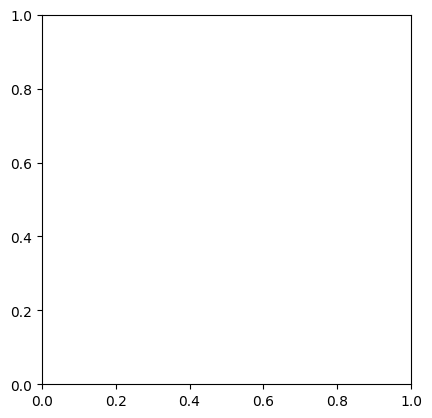

In [ ]:
plt.imshow(train_imgs_norm[0])

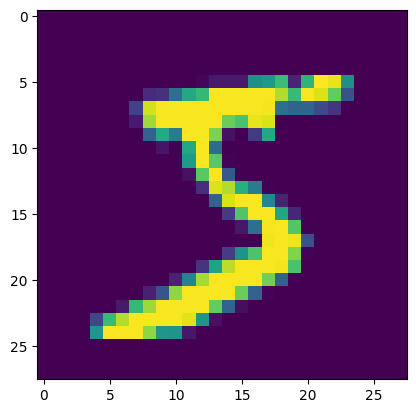

In [ ]:
plt.imshow(train_imgs_norm[0].reshape(28,28))

###**Build a model**

In Tensorflow, there are two types of model:
*   Sequencial Model
*   Functional API



We are going to define a few layers in sequence, draft is created according to that sequence.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape = (784, )),
    #Hidden Layers
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    #Output Layer
    tf.keras.layers.Dense(10,activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,042 (125.16 KB)

 Trainable params: 32,042 (125.16 KB)

 Non-trainable params: 0 (0.00 B)

### **Model Compilation**
Model Compilation -  Configures the training process.


3 things must be defined to conclude how the model will be compiled?
1.  what is going to be the optimizer?
2.  what is going to e the loss function?
3.  What is the metrics?



**Loss Function**:  **SparseCategoricalCrossentropy** is used for multi-class classification.

**Optimizer**: **Stochastic Gradient Descent (SGD)** adjusts weights to minimize loss.

**Metrics**: Tracks accuracy during training.

In [ ]:
model.compile(
              loss = tf.keras.losses.SparseCategoricalCrossentropy,
              optimizer= tf.keras.optimizers.SGD(learning_rate = 0.001),
              metrics=['accuracy'])

###**Model Training**


In [ ]:
h = model.fit(x = train_imgs_norm, y = train_labels, validation_split = 0.3, epochs = 10)

'''
'validation_split = 0.3' Uses 30% of training data for validation during training.
'epochs = 10' Specifies the number of times the entire dataset will be passed through the model.
'''

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9253 - loss: 0.2598 - val_accuracy: 0.9216 - val_loss: 0.2631
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9289 - loss: 0.2464 - val_accuracy: 0.9230 - val_loss: 0.2590
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9269 - loss: 0.2546 - val_accuracy: 0.9233 - val_loss: 0.2562
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9292 - loss: 0.2430 - val_accuracy: 0.9242 - val_loss: 0.2537
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9284 - loss: 0.2472 - val_accuracy: 0.9259 - val_loss: 0.2503
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9323 - loss: 0.2365 - val_accuracy: 0.9272 - val_loss: 0.2483
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9321 - loss: 0.2351 - val_accuracy: 0.9271 - val_loss: 0.2458
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9290 - loss: 0.2392 - 

"\n'validation_split = 0.3' Uses 30% of training data for validation during training.\n'epochs = 10' Specifies the number of times the entire dataset will be passed through the model.\n"

To Be Continued:

How we perform 'Model Prediction' after training the model?

How can the model identify a single image?